In [119]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [125]:
pip install shapely

Note: you may need to restart the kernel to use updated packages.


In [130]:
pip install geopandas


Note: you may need to restart the kernel to use updated packages.


In [131]:
import pandas as pd
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# for scientific and statistical computing
import scipy as sp
#To make working with geospatial data in python easier
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

plt.style.use('ggplot')

In [132]:
df = pd.read_csv('https://drive.google.com/uc?id=1P742LU5OTXbfFG2F6drbABk1O8UGf4Cd')

In [133]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [134]:
df.shape

(112634, 17)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [136]:
df.describe().style.background_gradient(cmap='Blues')

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,112634.000000,112634.000000,112634.000000,112634.000000,112348.000000,112634.000000,112634.000000
mean,98156.226850,2019.003365,87.812987,1793.439681,29.805604,199456680.022187,52966495754.096825
std,2648.733064,2.892364,102.334216,10783.753486,14.700545,93984269.925998,1699104499.621227
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4777.000000,1101001400.000000
25%,98052.000000,2017.000000,0.000000,0.000000,18.000000,148414150.000000,53033008500.000000
50%,98119.000000,2020.000000,32.000000,0.000000,34.000000,192389623.500000,53033029305.000000
75%,98370.000000,2022.000000,208.000000,0.000000,43.000000,219189879.500000,53053072506.000000
max,99701.000000,2023.000000,337.000000,845000.000000,49.000000,479254772.000000,56033000100.000000


In [137]:
df.isnull().sum().sort_values(ascending = False)

Electric Utility                                     443
Legislative District                                 286
Vehicle Location                                      24
Model                                                 20
VIN (1-10)                                             0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
DOL Vehicle ID                                         0
Base MSRP                                              0
Electric Range                                         0
Electric Vehicle Type                                  0
County                                                 0
Make                                                   0
Model Year                                             0
Postal Code                                            0
State                                                  0
City                                                   0
2020 Census Tract                                      0
dtype: int64

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Missing null values')

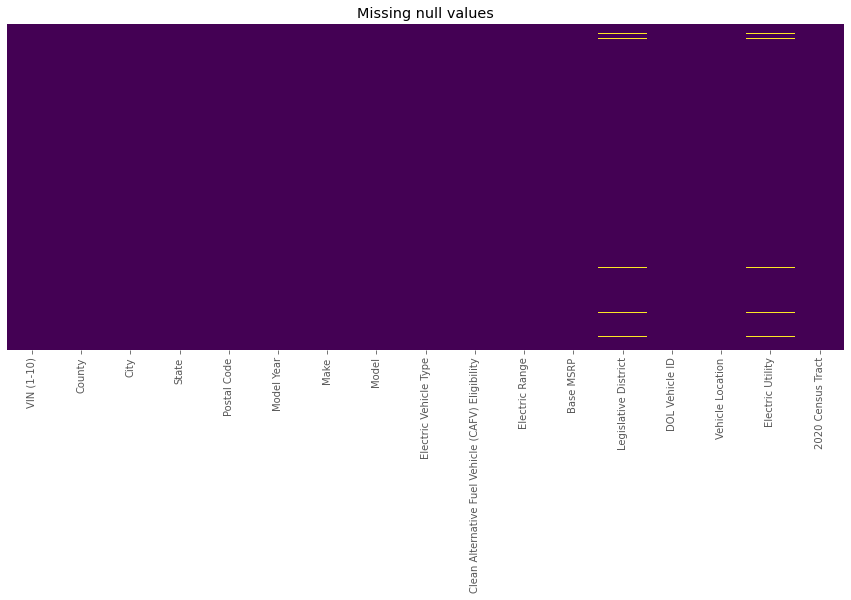

In [139]:
plt.rcParams['figure.figsize'] = (15,6)
sns.heatmap(df.isnull(),yticklabels = False, cbar = False , cmap = 'viridis')
plt.title("Missing null values")

In [140]:
missing_percentage = (df.isnull().sum().sort_values(ascending = False)/len(df))*100
missing_percentage

Electric Utility                                     0.393309
Legislative District                                 0.253920
Vehicle Location                                     0.021308
Model                                                0.017757
VIN (1-10)                                           0.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.000000
DOL Vehicle ID                                       0.000000
Base MSRP                                            0.000000
Electric Range                                       0.000000
Electric Vehicle Type                                0.000000
County                                               0.000000
Make                                                 0.000000
Model Year                                           0.000000
Postal Code                                          0.000000
State                                                0.000000
City                                                 0.000000
2020 Cen

In [141]:
df['Electric Utility'] = df['Electric Utility'].fillna('Utility Not Avalilable')
df['Legislative District'] = df['Legislative District'].fillna('Unknown')
df['Vehicle Location'] = df['Vehicle Location'].fillna('Unknown')
df['Model'] = df['Model'].fillna('Unknown')
df['2020 Census Tract'] = df['2020 Census Tract'].fillna('Unknown')
df['City'] = df['City'].fillna('Unknown')

# fill null values in the 'Postal Code' column with the mean salary
mean_postcode = df['Postal Code'].mean()
df['Postal Code'] = df['Postal Code'].fillna(mean_postcode)


df['County'] = df['County'].fillna('Unknown')

In [142]:
missing_percentage1 = (df.isnull().sum().sort_values(ascending = False)/len(df))*100
missing_percentage1

VIN (1-10)                                           0.0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.0
Electric Utility                                     0.0
Vehicle Location                                     0.0
DOL Vehicle ID                                       0.0
Legislative District                                 0.0
Base MSRP                                            0.0
Electric Range                                       0.0
Electric Vehicle Type                                0.0
County                                               0.0
Model                                                0.0
Make                                                 0.0
Model Year                                           0.0
Postal Code                                          0.0
State                                                0.0
City                                                 0.0
2020 Census Tract                                    0.0
dtype: float64

In [143]:
df['Postal Code'] = df['Postal Code'].astype(int)


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   VIN (1-10)                                         112634 non-null  object
 1   County                                             112634 non-null  object
 2   City                                               112634 non-null  object
 3   State                                              112634 non-null  object
 4   Postal Code                                        112634 non-null  int32 
 5   Model Year                                         112634 non-null  int64 
 6   Make                                               112634 non-null  object
 7   Model                                              112634 non-null  object
 8   Electric Vehicle Type                              112634 non-null  object
 9   Clea

In [145]:
from pandas import Index

In [146]:
# rename columns 
df = df.rename(columns={'Postal Code': 'PostalCode', 'Model Year': 'ModelYear', 'Electric Vehicle Type': 'Electric_Vehicle_Type', 
                        'Clean Alternative Fuel Vehicle (CAFV) Eligibility': 'CAFV_Eligibility',
                        'Electric Range':'Electric_Range', 'Base MSRP': 'Base_MSRP', 'Legislative District':'Legislative_District',
                        'DOL Vehicle ID': 'DOL_Vehicle_ID',
                        'Vehicle Location':'Vehicle_Location',
                        'Electric Utility':'Electric_Utility',
                        '2020 Census Tract':'2020_Census_Tract',
                        'VIN (1-10)':'VIN'})
print(df.columns)
Index(['VIN', 'County', 'City', 'State', 'PostalCode', 'ModelYear', 'Make',
       'Model', 'Electric_Vehicle_Type', 'CAFV_Eligibility', 'Electric_Range',
       'Base_MSRP', 'Legislative_District', 'DOL_Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', '2020_Census_Tract'],
      dtype='object')

Index(['VIN', 'County', 'City', 'State', 'PostalCode', 'ModelYear', 'Make',
       'Model', 'Electric_Vehicle_Type', 'CAFV_Eligibility', 'Electric_Range',
       'Base_MSRP', 'Legislative_District', 'DOL_Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', '2020_Census_Tract'],
      dtype='object')


Index(['VIN', 'County', 'City', 'State', 'PostalCode', 'ModelYear', 'Make',
       'Model', 'Electric_Vehicle_Type', 'CAFV_Eligibility', 'Electric_Range',
       'Base_MSRP', 'Legislative_District', 'DOL_Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', '2020_Census_Tract'],
      dtype='object')

In [147]:
##have a view of refreshed dataset again
df.isnull().sum().sort_values(ascending = False)

VIN                      0
CAFV_Eligibility         0
Electric_Utility         0
Vehicle_Location         0
DOL_Vehicle_ID           0
Legislative_District     0
Base_MSRP                0
Electric_Range           0
Electric_Vehicle_Type    0
County                   0
Model                    0
Make                     0
ModelYear                0
PostalCode               0
State                    0
City                     0
2020_Census_Tract        0
dtype: int64

In [148]:
df.duplicated().any()

False

In [149]:
df.columns.unique()

Index(['VIN', 'County', 'City', 'State', 'PostalCode', 'ModelYear', 'Make',
       'Model', 'Electric_Vehicle_Type', 'CAFV_Eligibility', 'Electric_Range',
       'Base_MSRP', 'Legislative_District', 'DOL_Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', '2020_Census_Tract'],
      dtype='object')

In [150]:
any_duplicates = df.duplicated(subset=['VIN', 'County', 'City', 'State', 'PostalCode', 'ModelYear', 'Make',
       'Model', 'Electric_Vehicle_Type', 'CAFV_Eligibility', 'Electric_Range',
       'Base_MSRP', 'Legislative_District', 'DOL_Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', '2020_Census_Tract']).any()

In [151]:
any_duplicates

False

Text(0.5, 1.0, 'Electric Vehicle Correlation Heatmap')

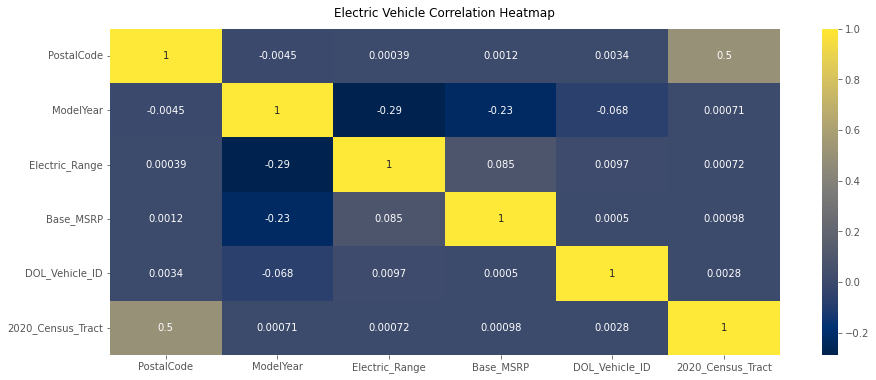

In [152]:
#checking the corrlation of all the attributes with target
plt.figure(figsize=(15, 6))
cmap = "cividis"
heatmap=sns.heatmap(df.corr(),cmap=cmap, annot=True)
heatmap.set_title('Electric Vehicle Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

Text(0, 0.5, 'Count')

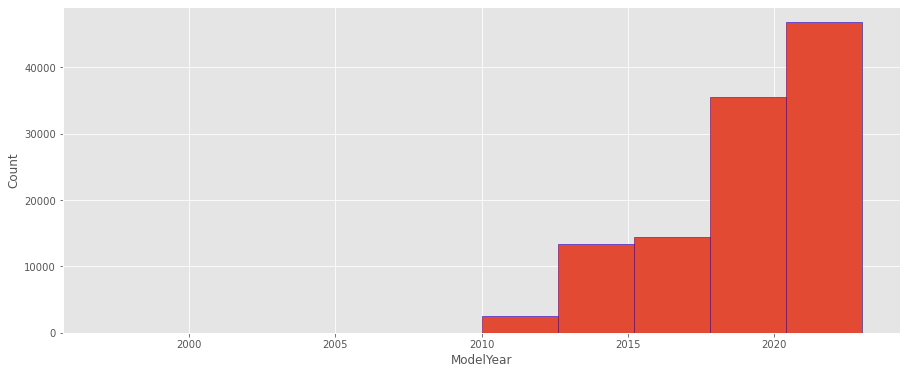

In [153]:
# Create a histogram of the PostalCode variable

plt.hist(df["ModelYear"],bins=10,edgecolor='blue')
plt.xlabel("ModelYear")
plt.ylabel("Count")


Text(0, 0.5, 'Count')

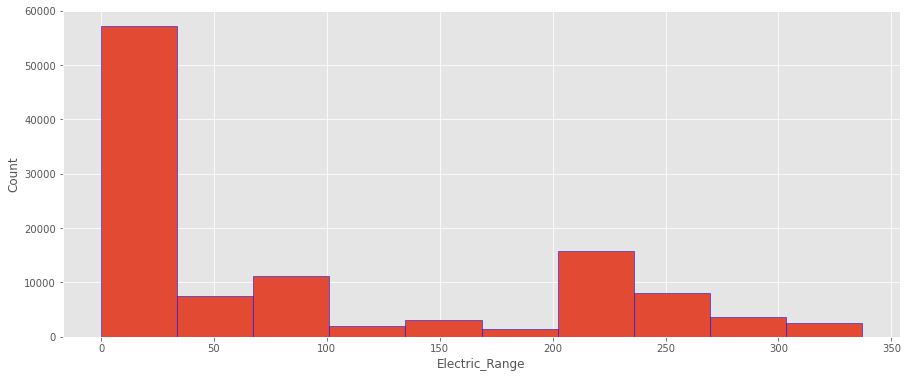

In [154]:
plt.hist(df["Electric_Range"],bins=10,edgecolor='blue')
plt.xlabel("Electric_Range")
plt.ylabel("Count")


Text(0, 0.5, 'Count')

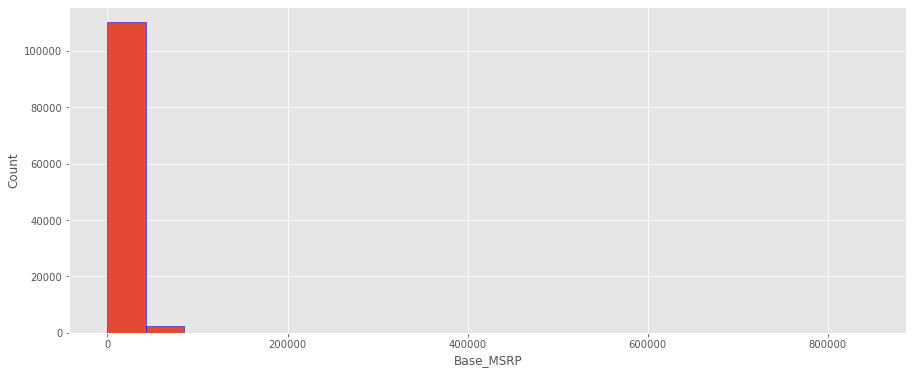

In [155]:
plt.hist(df["Base_MSRP"],bins=20,edgecolor='blue')
plt.xlabel("Base_MSRP")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

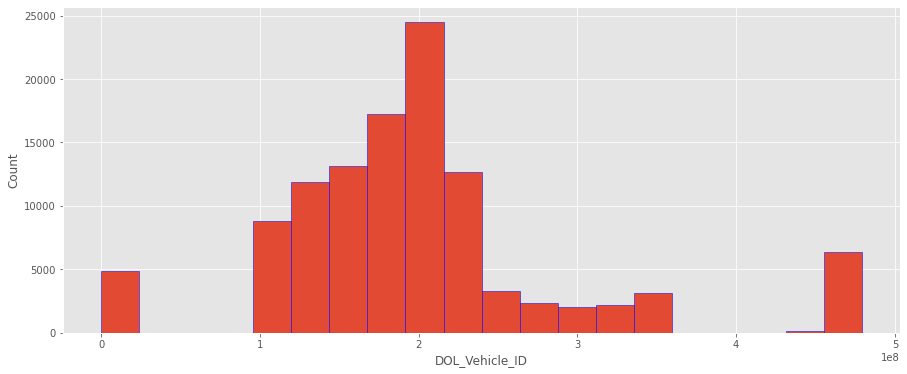

In [156]:
plt.hist(df["DOL_Vehicle_ID"],bins=20,edgecolor='blue')
plt.xlabel("DOL_Vehicle_ID")
plt.ylabel("Count")

In [157]:
df['Base_MSRP'].unique()


array([     0,  31950,  55700,  33950,  69900,  36900,  43700,  34995,
        39995,  32250,  44100, 110950,  59900,  52900,  54950, 102000,
        45600,  53400,  64950, 184400,  90700,  36800,  81100,  75095,
        52650,  91250, 109000,  98950,  89100, 845000], dtype=int64)

In [158]:
df.drop('Base_MSRP', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   VIN                    112634 non-null  object
 1   County                 112634 non-null  object
 2   City                   112634 non-null  object
 3   State                  112634 non-null  object
 4   PostalCode             112634 non-null  int32 
 5   ModelYear              112634 non-null  int64 
 6   Make                   112634 non-null  object
 7   Model                  112634 non-null  object
 8   Electric_Vehicle_Type  112634 non-null  object
 9   CAFV_Eligibility       112634 non-null  object
 10  Electric_Range         112634 non-null  int64 
 11  Legislative_District   112634 non-null  object
 12  DOL_Vehicle_ID         112634 non-null  int64 
 13  Vehicle_Location       112634 non-null  object
 14  Electric_Utility       112634 non-null  object
 15  

In [159]:
df['Electric_Utility'].unique()


array(['Utility Not Avalilable', 'PACIFICORP', 'PUGET SOUND ENERGY INC',
       'PUD NO 2 OF GRANT COUNTY',
       'PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)',
       'CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)', 'AVISTA CORP',
       'MODERN ELECTRIC WATER COMPANY',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF COWLITZ COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY',
       'BONNEVILLE POWER ADMINISTRATION||CITY OF ELLENSBURG - (WA)',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF GRAYS HARBOR COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)',
       'BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||INLAND POWER & LIGHT COMPANY',
       'BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOHOMISH COUNTY',
       'PUD NO 1 OF CHELAN COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||VERA IRRIGATION DISTRICT #15',
       'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||ELMHURST MUTUAL POWER

In [160]:
def categorize_electric_utility(value):
    if value == "Utility Not Avalilable":
        return "Not Available"
    elif "||" in value:
        return "Multi type Utilities"
    elif "|" in value:
        return "Single Type Utilities"
    else:
        return "Only One Option"
    


df['Electric_Utility_Category'] = df['Electric_Utility'].apply(categorize_electric_utility)

In [161]:
df['Electric_Utility_Category'].unique()

array(['Not Available', 'Only One Option', 'Multi type Utilities',
       'Single Type Utilities'], dtype=object)

In [162]:
df.head(5)

,VIN,County,City,State,PostalCode,ModelYear,Make,Model,Electric_Vehicle_Type,CAFV_Eligibility,Electric_Range,Legislative_District,DOL_Vehicle_ID,Vehicle_Location,Electric_Utility,2020_Census_Tract,Electric_Utility_Category
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,Unknown,198968248,POINT (-81.80023 24.5545),Utility Not Avalilable,12087972100,Not Available
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,Unknown,5204412,POINT (-114.57245 35.16815),Utility Not Avalilable,32003005702,Not Available
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602,Only One Option
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101,Only One Option
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500,Only One Option


In [163]:
df['Legislative_District'].unique()


array(['Unknown', 15.0, 39.0, 38.0, 1.0, 21.0, 10.0, 40.0, 22.0, 13.0,
       20.0, 2.0, 32.0, 7.0, 46.0, 30.0, 35.0, 44.0, 14.0, 9.0, 3.0, 23.0,
       24.0, 5.0, 33.0, 45.0, 19.0, 27.0, 26.0, 25.0, 43.0, 17.0, 6.0,
       41.0, 37.0, 34.0, 31.0, 12.0, 28.0, 48.0, 49.0, 4.0, 29.0, 36.0,
       42.0, 8.0, 18.0, 11.0, 16.0, 47.0], dtype=object)

In [164]:
df.drop('Legislative_District', axis=1, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   VIN                        112634 non-null  object
 1   County                     112634 non-null  object
 2   City                       112634 non-null  object
 3   State                      112634 non-null  object
 4   PostalCode                 112634 non-null  int32 
 5   ModelYear                  112634 non-null  int64 
 6   Make                       112634 non-null  object
 7   Model                      112634 non-null  object
 8   Electric_Vehicle_Type      112634 non-null  object
 9   CAFV_Eligibility           112634 non-null  object
 10  Electric_Range             112634 non-null  int64 
 11  DOL_Vehicle_ID             112634 non-null  int64 
 12  Vehicle_Location           112634 non-null  object
 13  Electric_Utility           112634 non-null  

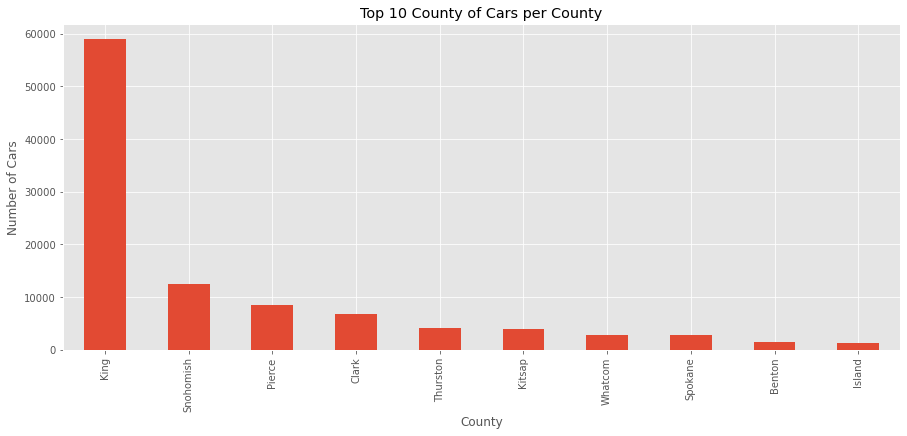

,County
King,59000
Snohomish,12434
Pierce,8535
Clark,6689
Thurston,4126
Kitsap,3847
Whatcom,2840
Spokane,2792
Benton,1376
Island,1307


In [165]:
car_counts = df['County'].value_counts().nlargest(10)

# plot the counts
car_counts.plot(kind='bar')
plt.xlabel('County')
plt.ylabel('Number of Cars')
plt.title('Top 10 County of Cars per County')
plt.show()

car_counts_df = car_counts.to_frame()
car_counts_df.style.background_gradient(cmap='Blues')

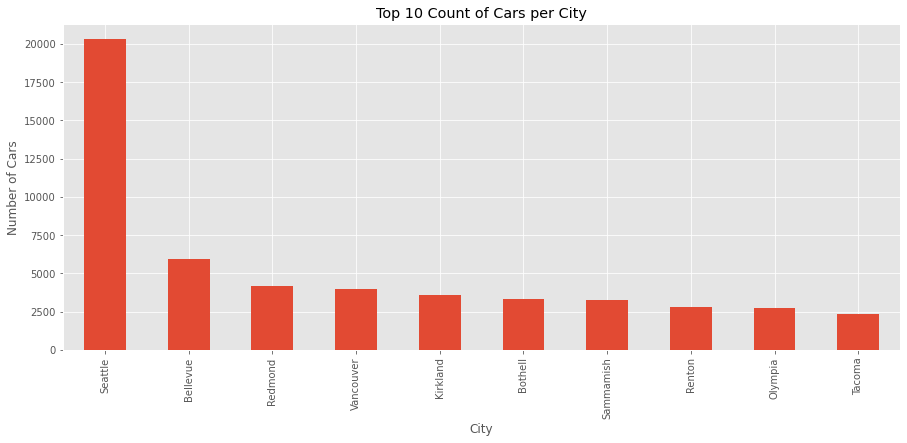

,City
Seattle,20305
Bellevue,5921
Redmond,4201
Vancouver,4013
Kirkland,3598
Bothell,3335
Sammamish,3292
Renton,2778
Olympia,2745
Tacoma,2379


In [166]:
car_counts_Cty = df['City'].value_counts().nlargest(10)

# plot the counts
car_counts_Cty.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Number of Cars')
plt.title('Top 10 Count of Cars per City')
plt.show()


car_counts_cty_df = car_counts_Cty.to_frame()
car_counts_cty_df.style.background_gradient(cmap='Blues')

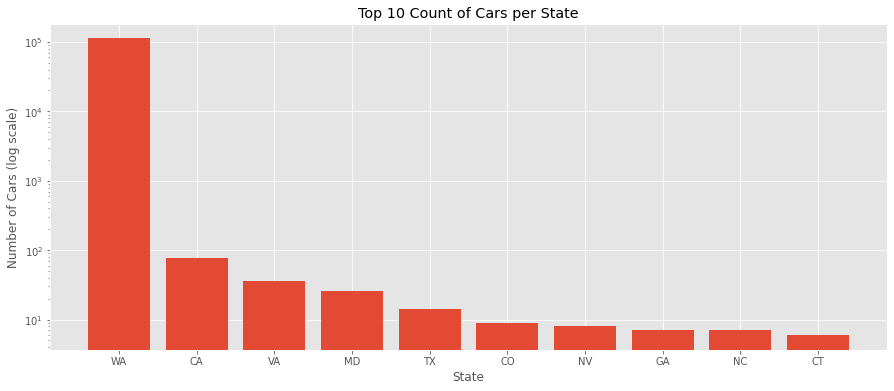

,State
WA,112348
CA,76
VA,36
MD,26
TX,14
CO,9
NV,8
GA,7
NC,7
CT,6


In [167]:
car_counts_St = df['State'].value_counts().nlargest(10)

# plot the counts with a logarithmic y-axis
plt.bar(car_counts_St.index, car_counts_St.values)
plt.yscale('log')
plt.xlabel('State')
plt.ylabel('Number of Cars (log scale)')
plt.title('Top 10 Count of Cars per State')
plt.show()


car_counts_St_df = car_counts_St.to_frame()
car_counts_St_df.style.background_gradient(cmap='Blues')

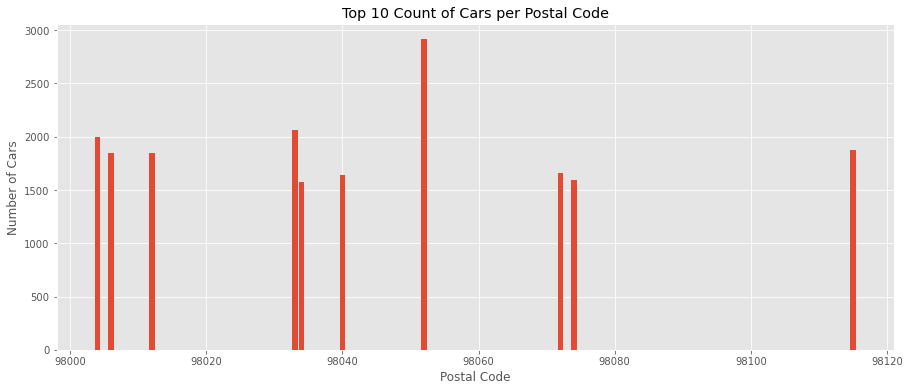

,PostalCode
98052,2916
98033,2059
98004,2001
98115,1880
98006,1852
98012,1850
98072,1661
98040,1639
98074,1594
98034,1578


In [168]:
car_counts_pc = df['PostalCode'].value_counts().nlargest(10)

# plot the counts with a logarithmic y-axis
plt.bar(car_counts_pc.index, car_counts_pc.values)
#plt.yscale('log')
plt.xlabel('Postal Code')
plt.ylabel('Number of Cars')
plt.title('Top 10 Count of Cars per Postal Code')
plt.show()

car_counts_pc_df = car_counts_pc.to_frame()
car_counts_pc_df.style.background_gradient(cmap='Blues')

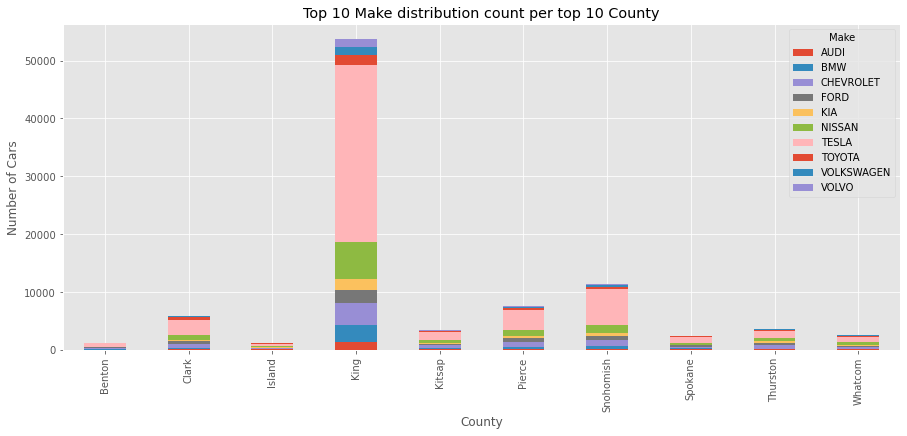

Make,AUDI,BMW,CHEVROLET,FORD,KIA,NISSAN,TESLA,TOYOTA,VOLKSWAGEN,VOLVO
County,,,,,,,,,,
Benton,27,53,197,113,44,111,571,80,23,11
Clark,108,254,677,405,281,764,2698,461,132,106
Island,32,37,197,91,70,147,478,66,42,24
King,1412,2788,3878,2190,2036,6330,30623,1753,1343,1371
Kitsap,86,173,464,249,195,576,1257,171,103,111


In [169]:
cnt_MkCounty = df.groupby(['County', 'Make']).size().reset_index(name='Count')

# Group the data by county and make, and sum the counts for each group
grouped_data = cnt_MkCounty.groupby(['County', 'Make'])['Count'].sum().reset_index()

# Group the data by county and sum the counts for each county
county_counts = grouped_data.groupby('County')['Count'].sum().reset_index()
make_counts = grouped_data.groupby('Make')['Count'].sum().reset_index()


# Sort the counties by count in descending order, and select the top 10
top_counties = county_counts.sort_values(by='Count', ascending=False).head(10)
top_makes = make_counts.sort_values(by='Count', ascending=False).head(10)


# Filter the data to only include the top 10 counties
filtered_data = grouped_data[grouped_data['County'].isin(top_counties['County']) & grouped_data['Make'].isin(top_makes['Make'])]


# Pivot the data to create a matrix with counties as rows, makes as columns, and counts as values
pivoted_data = filtered_data.pivot(index='County', columns='Make', values='Count').fillna(0)

# Create a stacked bar plot of the pivoted data
pivoted_data.plot(kind='bar', stacked=True)

# Set the title and axis labels
plt.title('Top 10 Make distribution count per top 10 County')
plt.xlabel('County')
plt.ylabel('Number of Cars')

# Show the plot
plt.show()


pivoted_data.head()

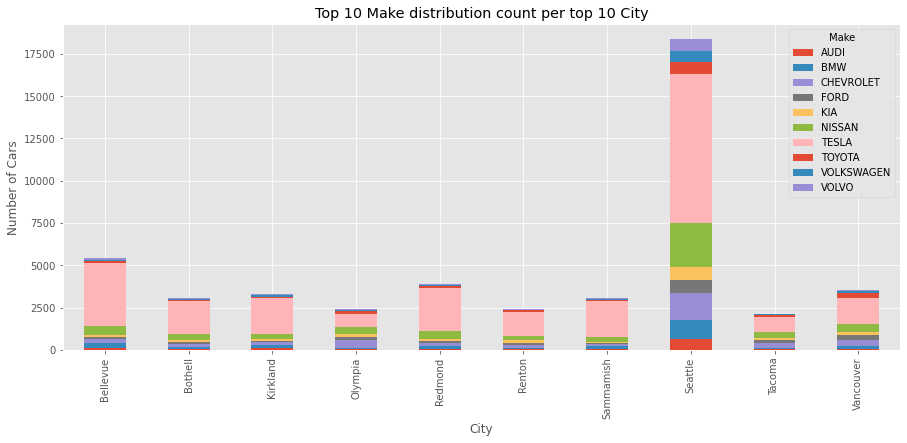

Make,AUDI,BMW,CHEVROLET,FORD,KIA,NISSAN,TESLA,TOYOTA,VOLKSWAGEN,VOLVO
City,,,,,,,,,,
Bellevue,120,295,211,131,131,527,3714,140,76,103
Bothell,48,119,183,128,98,374,1950,67,48,57
Kirkland,97,174,173,92,117,316,2112,70,70,91
Olympia,48,70,456,215,177,360,805,170,62,39
Redmond,70,168,189,110,112,460,2570,101,77,66


In [170]:
cnt_MkCity = df.groupby(['City', 'Make']).size().reset_index(name='Count')

# Group the data by county and make, and sum the counts for each group
grouped_data_cty = cnt_MkCity.groupby(['City', 'Make'])['Count'].sum().reset_index()

# Group the data by county and sum the counts for each county
city_counts = grouped_data_cty.groupby('City')['Count'].sum().reset_index()
make_counts = grouped_data_cty.groupby('Make')['Count'].sum().reset_index()


# Sort the counties by count in descending order, and select the top 10
top_cities = city_counts.sort_values(by='Count', ascending=False).head(10)
top_makes = make_counts.sort_values(by='Count', ascending=False).head(10)


# Filter the data to only include the top 10 counties
filtered_data_Cty = grouped_data_cty[grouped_data_cty['City'].isin(top_cities['City']) & grouped_data_cty['Make'].isin(top_makes['Make'])]


# Pivot the data to create a matrix with counties as rows, makes as columns, and counts as values
pivoted_data_cty = filtered_data_Cty.pivot(index='City', columns='Make', values='Count').fillna(0)

# Create a stacked bar plot of the pivoted data
pivoted_data_cty.plot(kind='bar', stacked=True)

# Set the title and axis labels
plt.title('Top 10 Make distribution count per top 10 City')
plt.xlabel('City')
plt.ylabel('Number of Cars')

# Show the plot
plt.show()


pivoted_data_cty.head()

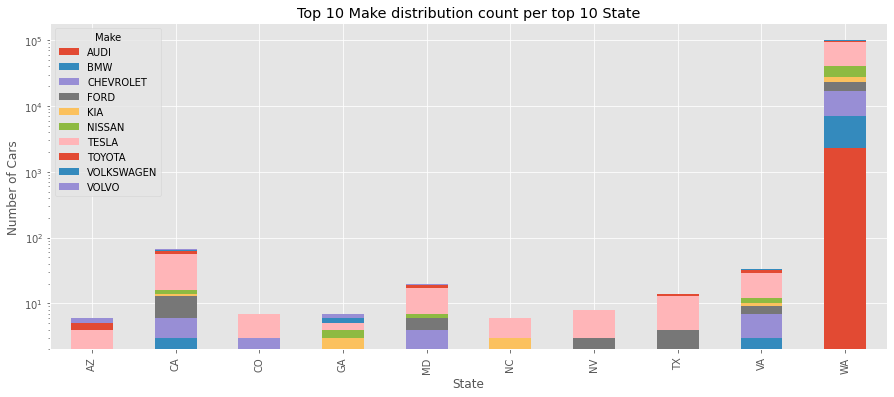

Make,AUDI,BMW,CHEVROLET,FORD,KIA,NISSAN,TESLA,TOYOTA,VOLKSWAGEN,VOLVO
State,,,,,,,,,,
AZ,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0
CA,2.0,1.0,3.0,7.0,1.0,2.0,40.0,6.0,2.0,4.0
CO,0.0,1.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
GA,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
MD,1.0,1.0,2.0,2.0,0.0,1.0,10.0,2.0,0.0,1.0
NC,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0
NV,0.0,0.0,2.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0
TX,0.0,0.0,0.0,4.0,0.0,0.0,9.0,1.0,0.0,0.0
VA,0.0,3.0,4.0,2.0,1.0,2.0,17.0,3.0,1.0,0.0


In [171]:
cnt_Mk_St = df.groupby(['State', 'Make']).size().reset_index(name='Count')

# Group the data by county and make, and sum the counts for each group
grouped_data_St = cnt_Mk_St.groupby(['State', 'Make'])['Count'].sum().reset_index()

# Group the data by county and sum the counts for each county
st_counts = grouped_data_St.groupby('State')['Count'].sum().reset_index()
make_counts = grouped_data_St.groupby('Make')['Count'].sum().reset_index()


# Sort the counties by count in descending order, and select the top 10
top_States = st_counts.sort_values(by='Count', ascending=False).head(10)
top_makes = make_counts.sort_values(by='Count', ascending=False).head(10)


# Filter the data to only include the top 10 counties
filtered_data_St = grouped_data_St[grouped_data_St['State'].isin(top_States['State']) & grouped_data_St['Make'].isin(top_makes['Make'])]


# Pivot the data to create a matrix with counties as rows, makes as columns, and counts as values
pivoted_data_St = filtered_data_St.pivot(index='State', columns='Make', values='Count').fillna(0)

# Create a stacked bar plot of the pivoted data
pivoted_data_St.plot(kind='bar', stacked=True)

# Set the title and axis labels
plt.title('Top 10 Make distribution count per top 10 State')
plt.yscale('log')
plt.xlabel('State')
plt.ylabel('Number of Cars')

# Show the plot
plt.show()


pivoted_data_St.head(10)

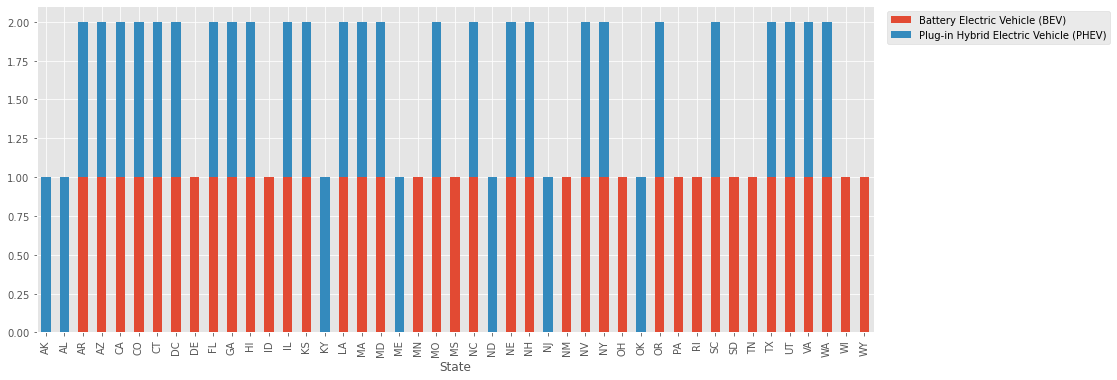

,State,Electric_Vehicle_Type,Count
6,CA,Battery Electric Vehicle (BEV),50
7,CA,Plug-in Hybrid Electric Vehicle (PHEV),26
8,CO,Battery Electric Vehicle (BEV),7
4,AZ,Battery Electric Vehicle (BEV),4
2,AR,Battery Electric Vehicle (BEV),3
5,AZ,Plug-in Hybrid Electric Vehicle (PHEV),2
9,CO,Plug-in Hybrid Electric Vehicle (PHEV),2
0,AK,Plug-in Hybrid Electric Vehicle (PHEV),1
1,AL,Plug-in Hybrid Electric Vehicle (PHEV),1
3,AR,Plug-in Hybrid Electric Vehicle (PHEV),1


In [172]:
## EVT Distribution count per state
evt_Dis_cnt = df.groupby(['State', 'Electric_Vehicle_Type']).size().reset_index(name='Count')
evt_Dis_cnt.groupby(['State', 'Electric_Vehicle_Type'])['Count'].count().unstack().plot(kind='bar', stacked=True)

# Move legend outside of plot
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

plt.show()

evt_Dis_cnt.head(10).sort_values(by='Count', ascending=False)

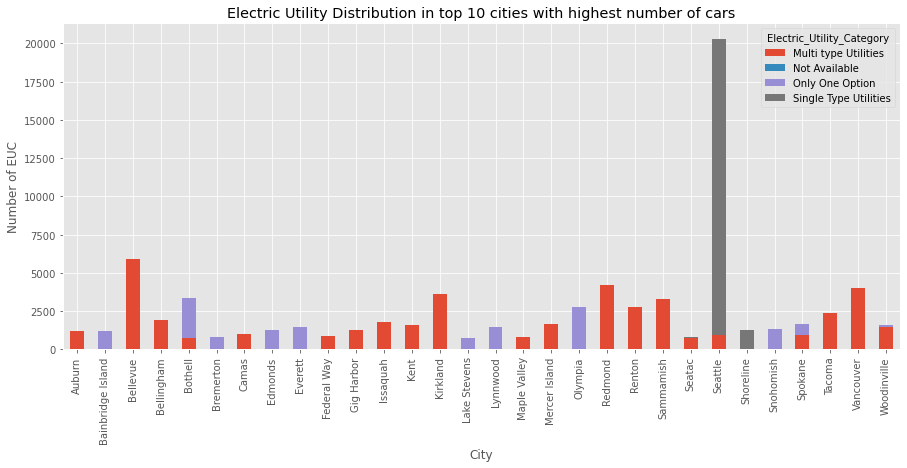

Electric_Utility_Category,Multi type Utilities,Not Available,Only One Option,Single Type Utilities
City,,,,
Auburn,1173.0,0.0,0.0,0.0
Bainbridge Island,0.0,12.0,1224.0,0.0
Bellevue,5920.0,1.0,0.0,0.0
Bellingham,1944.0,0.0,8.0,0.0
Bothell,733.0,0.0,2602.0,0.0
Bremerton,0.0,0.0,805.0,0.0
Camas,1020.0,0.0,0.0,0.0
Edmonds,0.0,3.0,1277.0,0.0
Everett,3.0,0.0,1474.0,0.0


In [173]:
cnt_Cty_EUD = df.groupby(['City', 'Electric_Utility_Category']).size().reset_index(name='Count')

# Group the data by county and make, and sum the counts for each group
grouped_data_Cty_EUD = cnt_Cty_EUD.groupby(['City', 'Electric_Utility_Category'])['Count'].sum().reset_index()

# Group the data by county and sum the counts for each county
Cty_EUD_counts = grouped_data_Cty_EUD.groupby('City')['Count'].sum().reset_index()
# make_counts = grouped_data_St.groupby('Make')['Count'].sum().reset_index()


# Sort the counties by count in descending order, and select the top 10
top_Cty_EUD_counts = Cty_EUD_counts.sort_values(by='Count', ascending=False).head(30)
# top_makes = make_counts.sort_values(by='Count', ascending=False).head(10)


# Filter the data to only include the top 10 counties
filtered_data_Cty_EUD = grouped_data_Cty_EUD[grouped_data_Cty_EUD['City'].isin(top_Cty_EUD_counts['City'])]


# Pivot the data to create a matrix with counties as rows, makes as columns, and counts as values
pivoted_data_Cty_EUD = filtered_data_Cty_EUD.pivot(index='City', columns='Electric_Utility_Category', values='Count').fillna(0)

# Create a stacked bar plot of the pivoted data
pivoted_data_Cty_EUD.plot(kind='bar', stacked=True)

# Set the title and axis labels
plt.title('Electric Utility Distribution in top 10 cities with highest number of cars')
# plt.yscale('log')
plt.xlabel('City')
plt.ylabel('Number of EUC')

# Show the plot
plt.show()


pivoted_data_Cty_EUD.head(10)

Text(0.5, 1.0, 'Bottom 5 Cars')

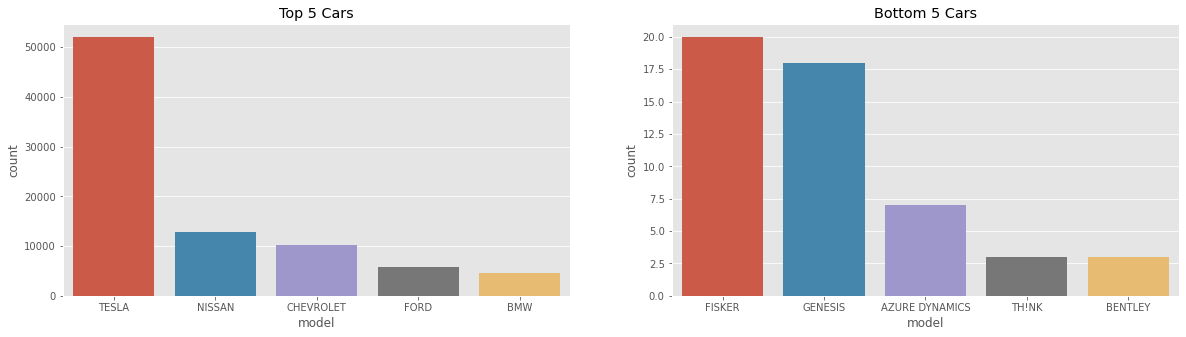

In [174]:
car_market_share = pd.DataFrame(df.groupby('Make')['VIN'].count().reset_index()).sort_values(by='VIN',ascending=False).reset_index(drop=True)
car_market_share.columns = ['model','count']
car_market_share_top_5 = car_market_share.head(5)
car_market_share_bottom_5 = car_market_share.tail(5)

fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.barplot(data=car_market_share_top_5, x="model", y="count",ax=axes[0])
sns.barplot(data=car_market_share_bottom_5, x="model", y="count",ax=axes[1])
axes[0].set_title('Top 5 Cars')
axes[1].set_title('Bottom 5 Cars')

In [175]:
import plotly.express as ps

In [176]:
#import plotly.express as ps
km_range = pd.DataFrame(df.groupby('Make')['Electric_Range'].mean().reset_index()).sort_values(by='Electric_Range',ascending=False).reset_index(drop=True).head(10)
km_range.columns = ['model','km_range']
ps.pie(data_frame=km_range, names='model', values='km_range', hover_name='km_range',title='Top 10 Model with KM range',hole=True)


In [177]:
# Year Wise Cars
year_wise_cars = df.groupby('ModelYear')['VIN'].count().reset_index()
year_wise_cars.columns = ['year','num_cars']

fig = ps.line(year_wise_cars,x="year", y="num_cars", title='Year Wise Number of Cars',markers=True)
fig.show()


In [178]:
year_wise_cars.sort_values(by='num_cars', ascending=False).head(10)

,year,num_cars
18,2022,26530
17,2021,18364
14,2018,14246
16,2020,11038
15,2019,10266
13,2017,8644
12,2016,5735
11,2015,4940
9,2013,4691
10,2014,3685


In [179]:
df['lat'] = df['Vehicle_Location'].str.split(' ').str[1].str.split('(').str[1].astype(float)
df['lon'] = df['Vehicle_Location'].str.split(' ').str[2].str.split(')').str[0].astype(float)
df['lat'] = df['lat'].fillna(0)
df['lon'] = df['lon'].fillna(0)

C:\Users\Shankar\AppData\Local\Temp/ipykernel_19248/607117436.py:5: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



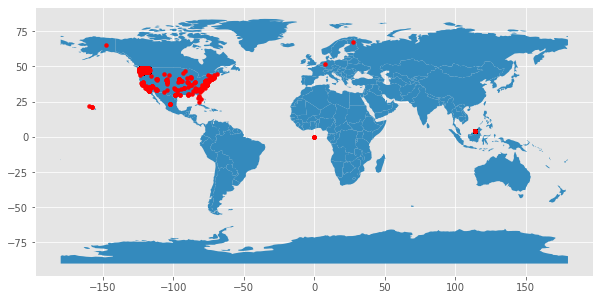

In [180]:
geometry = [Point(xy) for xy in zip(df['lat'], df['lon'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);